<a href="https://colab.research.google.com/github/Deividasbu/MDV/blob/main/MDV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensional Data Visualization


## Exercise 1
### Choose a multidimensional data set - from MSc thesis research, work, hobbies, or Internet (e.g. UCI Machine Learning Repository). Describe the data set in the report: meaning, numbers and properties of objects (instances) and features (attributes, parameters).

### Data Collection Information
For this project, I utilized the Spotify API to extract data about the Top 200 Global songs.   
The playlist can be accessed through the following link: https://open.spotify.com/playlist/4yNfFAuHcSgzbcSm6q5QDu   
The data extraction was conducted on February 29, 2024, at 17:30.  
Extraction code can be provided upon request.  

In [1]:
# Load dataset
import pandas as pd

df = pd.read_csv('spotify_top_200_24-02-29.csv',index_col=False)
df = df.drop(columns=['Unnamed: 0'])

df.head()

,name,album,artist,genre,release_date,length,popularity,id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Beautiful Things,Beautiful Things,Benson Boone,singer-songwriter pop,2024-01-18,3.005067,100,6tNQ70jh4OwmPGpYy6R2o9,0.151,0.472,0.471,0.000000,0.140,-5.692,0.0603,105.029,0.219
1,CARNIVAL,VULTURES 1,¥$,NaN,2024-02-09,4.405400,94,3w0w2T288dec0mgeZZqoNN,0.189,0.594,0.811,0.000000,0.339,-5.746,0.1590,148.144,0.311
2,TEXAS HOLD 'EM,TEXAS HOLD 'EM,Beyoncé,pop,2024-02-10,3.927267,86,7AYmToZ5y67fBjq4RLFbuq,0.588,0.725,0.709,0.000000,0.135,-6.514,0.0720,110.024,0.353
3,greedy,greedy,Tate McRae,alt z,2023-09-15,2.197867,99,3rUGC1vUpkDG9CZFHMur1t,0.256,0.750,0.733,0.000000,0.114,-3.180,0.0319,111.018,0.844
4,Cruel Summer,Lover,Taylor Swift,pop,2019-08-23,2.973767,99,1BxfuPKGuaTgP7aM0Bbdwr,0.117,0.552,0.702,0.000021,0.105,-5.707,0.1570,169.994,0.564


In [ ]:
# Print information about dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              200 non-null    object 
 1   album             200 non-null    object 
 2   artist            200 non-null    object 
 3   genre             187 non-null    object 
 4   release_date      200 non-null    object 
 5   length            200 non-null    float64
 6   popularity        200 non-null    int64  
 7   id                200 non-null    object 
 8   acousticness      200 non-null    float64
 9   danceability      200 non-null    float64
 10  energy            200 non-null    float64
 11  instrumentalness  200 non-null    float64
 12  liveness          200 non-null    float64
 13  loudness          200 non-null    float64
 14  speechiness       200 non-null    float64
 15  tempo             200 non-null    float64
 16  valence           200 non-null    float64
dt

### Description of the Dataset

### Instances (Objects):
- Each instance represents a track from the Top 200 Global songs playlist accessed through Spotify's API, with details such as the track's name, album, artist, genre, release date, and various audio features.

### Features (Attributes, Parameters):
#### Categorical Features:
- `name`: Name of the track.
- `album`: Album name.
- `artist`: Artist name.
- `genre`: Genre of the track.
- `release_date`: Release date of the track.
- `id`: Spotify ID of the track.

#### Numerical Features:
- `length`: Length of the track in minutes.
- `popularity`: Popularity score of the track.
- `acousticness`: Confidence measure of whether the track is acoustic.
- `danceability`: Describes how suitable the track is for dancing.
- `energy`: Perceptual measure of intensity and activity of the track.
- `instrumentalness`: Predicts whether the track contains no vocals.
- `liveness`: Detects the presence of an audience in the recording.
- `loudness`: Overall loudness of the track in decibels.
- `speechiness`: Detects the presence of spoken words in the track.
- `tempo`: Estimated tempo of the track in beats per minute.
- `valence`: Measure describing the musical positiveness conveyed by the track.

### Data Type:
- `name`, `album`, `artist`, `genre`, `release_date`, and `id` are strings (object data type).
- `length`, `popularity`, `acousticness`, `danceability`, `energy`, `instrumentalness`, `liveness`, `loudness`, `speechiness`, `tempo`, and `valence` are numerical values (float or integer data type).

  
More information on features can be found here:
 https://developer.spotify.com/documentation/web-api/reference/get-audio-features



## Exercise 2
### Visualize multidimensional data set using at least three direct visualization methods. Matlab (Statistical Toolbox), Orange, Visulab, Xmdv, Pandas, or other software may be used. Include at least three images in the report and comment them. Include general conclusions describing insights about the data and comparing results of different methods indicating which one is most useful for the analyzed data.

Original data has too many distinct genres so they are narrowed down to 5 categories.

In [2]:
# Define a refined mapping function to categorize genres into the primary groups
def map_genre_to_primary_category(genre):
    if pd.isna(genre):
        return "Other"
    genre = genre.lower()
    if 'pop' in genre:
        return "Pop"
    elif 'rap' in genre:
        return "Rap"
    elif 'hip hop' in genre:
        return "Hip Hop"
    elif 'rock' in genre:
        return "Rock"
    else:
        return "Other"

# Apply the refined mapping function to the genre column
df['primary_genre'] = df['genre'].apply(map_genre_to_primary_category)

# Display the first few rows to verify the new mapping
df[['genre', 'primary_genre']].head()


,genre,primary_genre
0,singer-songwriter pop,Pop
1,NaN,Other
2,pop,Pop
3,alt z,Other
4,pop,Pop


In [3]:
df.primary_genre.value_counts()

Other      80
Pop        68
Hip Hop    25
Rock       15
Rap        12
Name: primary_genre, dtype: int64

Numerical features are normalised

In [4]:
from sklearn.preprocessing import MinMaxScaler

# List of column names to normalize
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'loudness', 'tempo']

features_to_normalize = df[features].copy()

scaler = MinMaxScaler()

# Fit the scaler to the data and transform the features
normalized_features = scaler.fit_transform(features_to_normalize)

# Create a DataFrame from the normalized features
normalized_df = pd.DataFrame(normalized_features, columns=features)
normalized_df['primary_genre'] = df['primary_genre']
normalized_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,loudness,tempo,primary_genre
0,0.155824,0.250000,0.434718,0.000000,0.130857,0.081574,0.184184,0.774801,0.275085,Pop
1,0.195040,0.444268,0.823778,0.000000,0.372420,0.298593,0.288717,0.771307,0.591352,Other
2,0.606808,0.652866,0.707060,0.000000,0.124788,0.107300,0.336439,0.721607,0.311726,Pop
3,0.264184,0.692675,0.734523,0.000000,0.099296,0.019129,0.894330,0.937358,0.319017,Other
4,0.120736,0.377389,0.699050,0.000023,0.088371,0.294195,0.576185,0.773830,0.751630,Pop


### Parallel Coordinates Plot

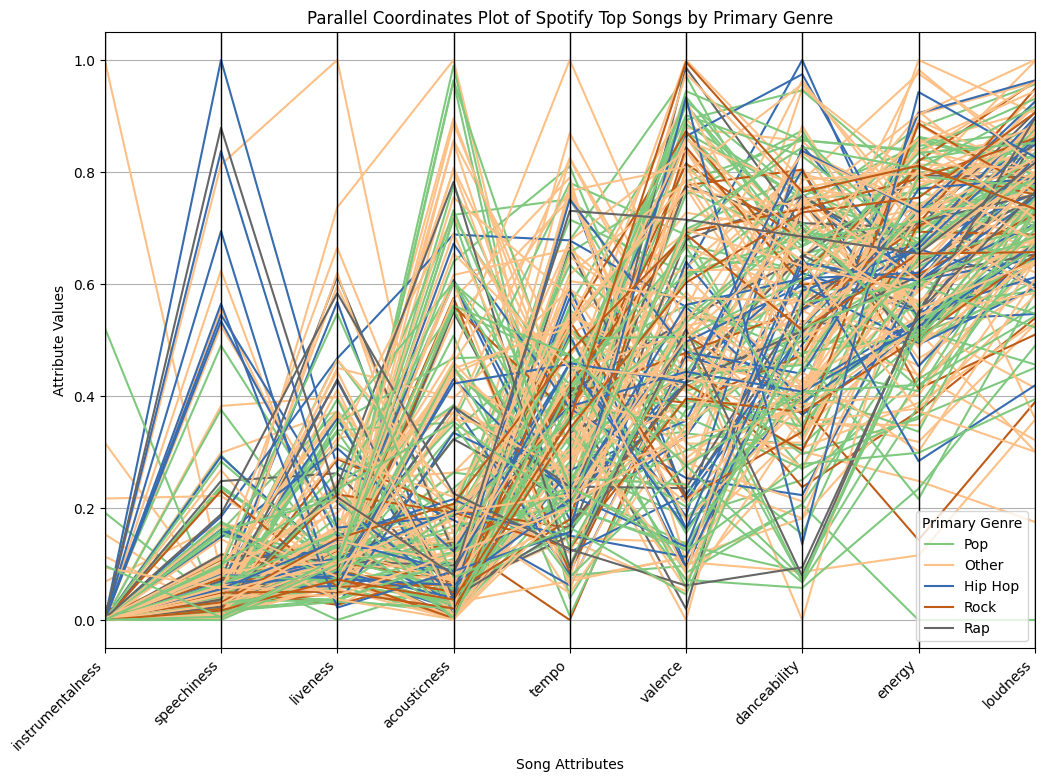

In [14]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

columns_order = ['instrumentalness',	'speechiness',	'liveness',	'acousticness',	'tempo', 'valence',	'danceability',	'energy',	'loudness', 'primary_genre'	]


# Plotting Parallel Coordinates
plt.figure(figsize=(12, 8))
parallel_coordinates(normalized_df[columns_order], class_column='primary_genre', colormap='Accent', alpha=1)
plt.xticks(rotation=45, ha="right")
plt.title('Parallel Coordinates Plot of Spotify Top Songs by Primary Genre')
plt.xlabel('Song Attributes')
plt.ylabel('Attribute Values')
plt.grid(True)
plt.legend(title='Primary Genre')
plt.show()

No clear genre separability can be seen prom the visualization.  
We could only state that Hip Hop more often that other genres have higher speechiness.

###Pairplot

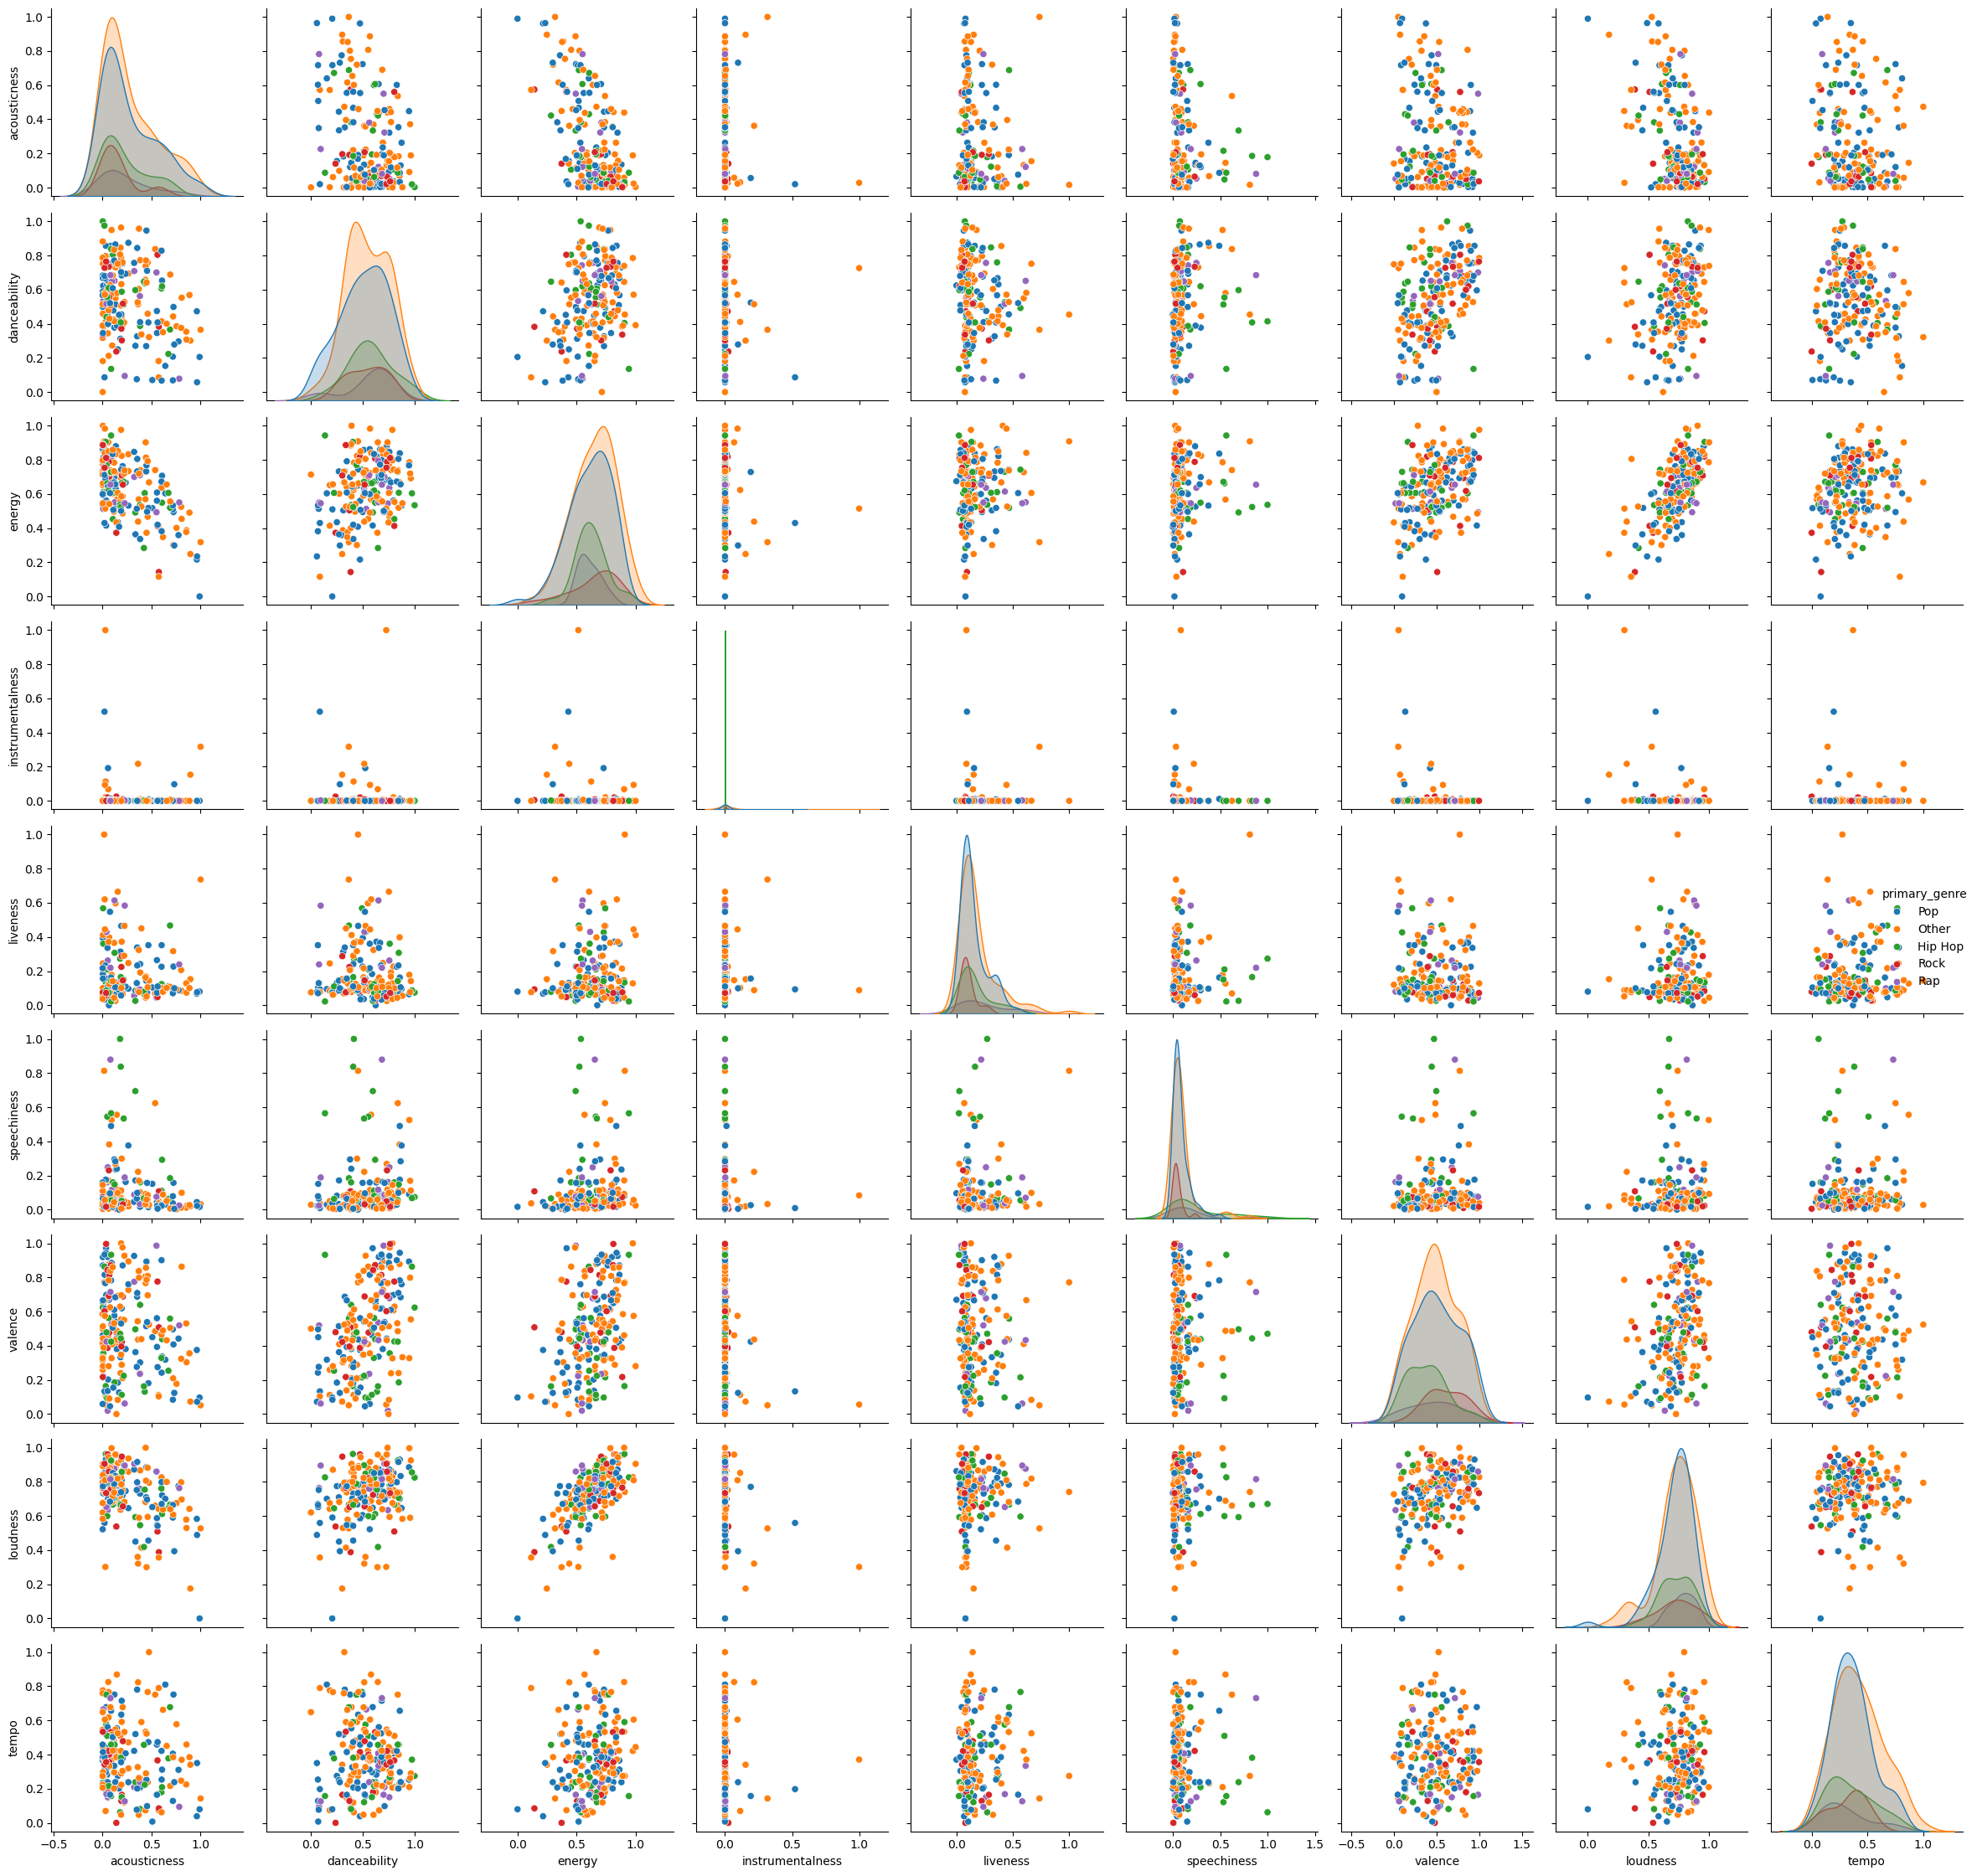

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the Scatter Plot Matrix with seaborn's pairplot function
sns.pairplot(normalized_df, hue='primary_genre', palette='tab10', diag_kind='kde')

# Adjust the aesthetics and display the plot
plt.tight_layout()
plt.show()


Also, no genre separability can be seen from the visualization.

### Radviz plot
Plot 1: Rhythm-related features (tempo, danceability, energy)  
Plot 2: Vocal-related features (speechiness, acousticness, liveness)  
Plot 3: Other sonic qualities (instrumentalness, loudness, valence)

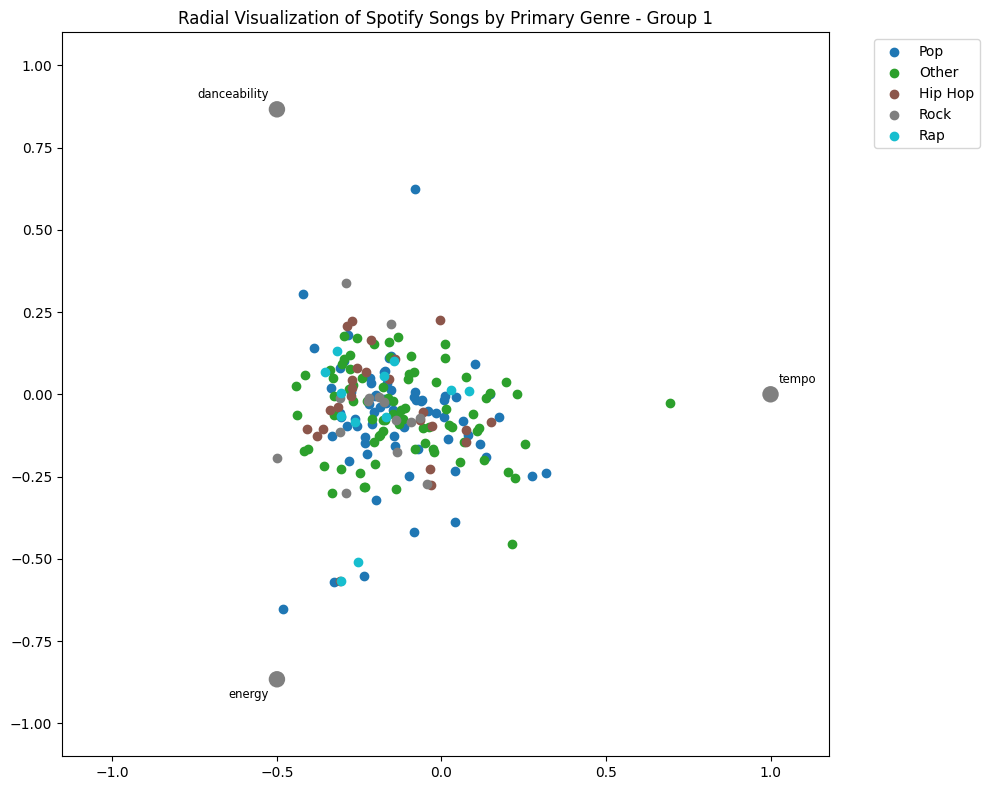

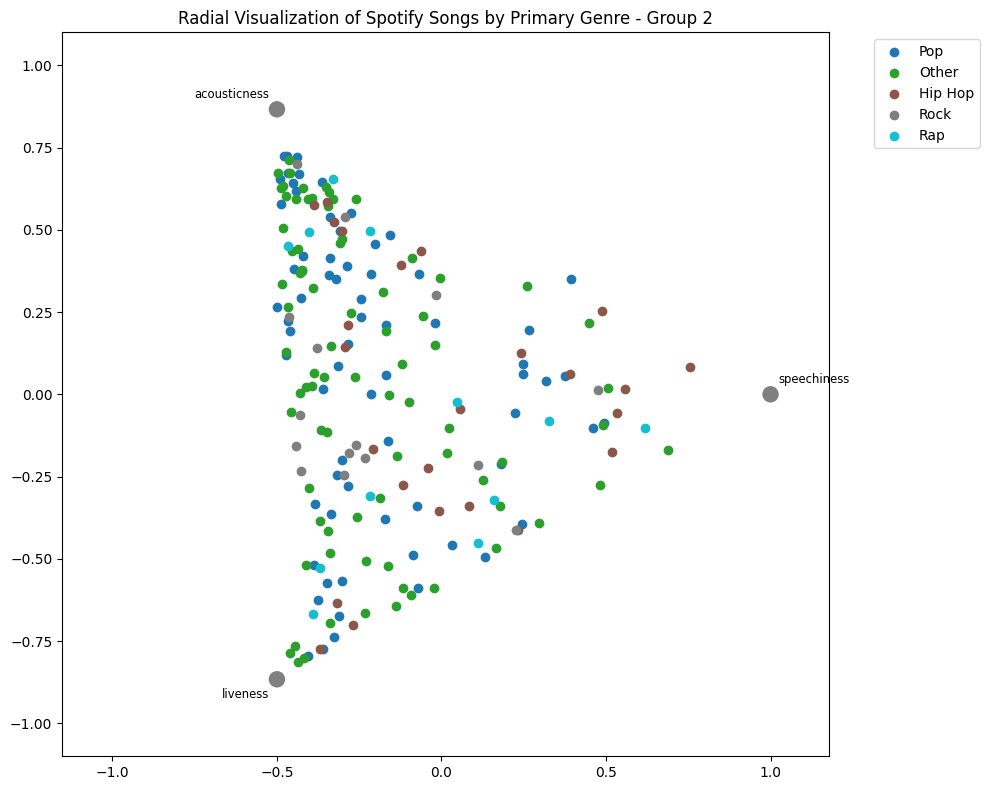

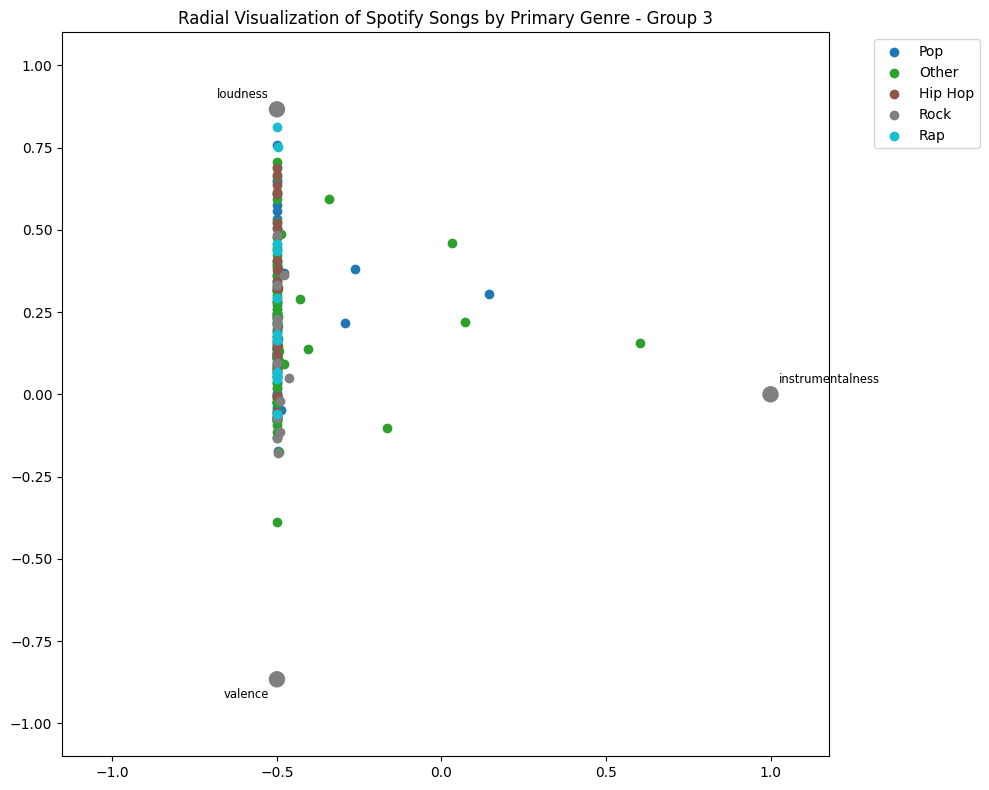

In [11]:
from pandas.plotting import radviz
import matplotlib.pyplot as plt

# Define the subsets of features for each plot
feature_groups = [
    ['tempo', 'danceability', 'energy'],
    ['speechiness', 'acousticness', 'liveness'],
    ['instrumentalness', 'loudness', 'valence']
]

# Plot each group of features using RadViz
for i, features in enumerate(feature_groups, start=1):
    # Prepare the data for RadViz
    radviz_data = normalized_df[features + ['primary_genre']].copy()

    # Plotting RadViz
    plt.figure(figsize=(10, 8))
    radviz(radviz_data, 'primary_genre', colormap='tab10')
    plt.title(f'Radial Visualization of Spotify Songs by Primary Genre - Group {i}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


Genres show no separability neither when looking at Rhythm-related features, nor at Vocal-related or Other sonic features.  


### Explanation of the results


1. Genres often share musical characteristics, leading to an inherent overlap in their feature distributions. For example, pop and rock songs might share similar tempo ranges or energy levels. This overlap can make it challenging to visually separate genres based solely on certain features.

2. The selected features might not capture the nuances that distinguish genres. While features like tempo, energy, and danceability provide a quantitative measure of song characteristics, they may not encapsulate the full spectrum of what differentiates genres. More subtle or complex features, such as specific rhythmic patterns, chord progressions, or lyrical content, could be more informative but are harder to quantify and were not included in the analysis.

3. Data Quality and Representation
The dataset's quality and how well it represents each genre can significantly impact the analysis. If there are inaccuracies in genre labeling, a limited number of tracks per genre, or a lack of diversity in the selected songs, these factors could contribute to the difficulty in visualizing separability between genres.

4. Complexity of Musical Genres
Musical genres are complex and often subjective categories that can be influenced by cultural, historical, and personal factors. The boundaries between genres can be fluid, with many songs and artists drawing influences from multiple genres.